In [6]:
# CONCATENAR FILES A PANDAS

import pandas as pd

d1 = {"Name": ["Pankaj", "Lisa"], "ID": [1, 2]}
d2 = {"Name": "David", "ID": 3}

df1 = pd.DataFrame(d1, index={1, 2})
df2 = pd.DataFrame(d2, index={3})

print('----- df1\n', df1)
print('----- df2\n', df2)

df3 = pd.concat([df1, df2])

print('----- df3\n', df3)

----- df1
      Name  ID
1  Pankaj   1
2    Lisa   2
----- df2
     Name  ID
3  David   3
----- df3
      Name  ID
1  Pankaj   1
2    Lisa   2
3   David   3


In [7]:
# CONCATENAR COLUMNES A PANDAS (axis = 1)

d1 = {"Name": ["Pankaj", "Lisa"], "ID": [1, 2]}
d2 = {"Role": ["Admin", "Editor"]}

df1 = pd.DataFrame(d1, index={1, 2})
df2 = pd.DataFrame(d2, index={1, 2})

df3 = pd.concat([df1, df2], axis=1)
print('----- df3\n', df3)

----- df3
      Name  ID    Role
1  Pankaj   1   Admin
2    Lisa   2  Editor


In [8]:
# CONCATENAR COLUMNES I FER AGRUPACIONS PER DATAFRAME

import pandas as pd
df1 = pd.DataFrame({'A':['A0','A1','A2'],'B':['B0','B1','B2'],'C':['C0','C1','C2']},
                                            index=pd.date_range('2017-01-01',periods=3, freq='M'))
df2 = pd.DataFrame({'A':['A3','A4','A5'],'B':['B3','B4','B5'],'C':['C3','C4','C5']},
                                            index=pd.date_range('2017-01-01',periods=3, freq='M'))

print(df1)
print(df2)


             A   B   C
2017-01-31  A0  B0  C0
2017-02-28  A1  B1  C1
2017-03-31  A2  B2  C2
             A   B   C
2017-01-31  A3  B3  C3
2017-02-28  A4  B4  C4
2017-03-31  A5  B5  C5


In [9]:
pd.concat([df1,df2],axis=1)

A   B   C   A   B   C
2017-01-31  A0  B0  C0  A3  B3  C3
2017-02-28  A1  B1  C1  A4  B4  C4
2017-03-31  A2  B2  C2  A5  B5  C5

In [4]:
pd.concat([df1,df2],axis=1,keys=['df1','df2']).swaplevel(0,1,axis=1).sort_index(axis=1)

A       B       C    
           df1 df2 df1 df2 df1 df2
2017-01-31  A0  A3  B0  B3  C0  C3
2017-02-28  A1  A4  B1  B4  C1  C4
2017-03-31  A2  A5  B2  B5  C2  C5

In [3]:
import pandas as pd

df = pd.read_csv('./dat/clients_02.csv', delimiter=";")
df

id                              NOM CLIENT  EDAT
0  730                                    AAA      3
1  734            Juan Alberto  Muete Camargo     20
2  735              Isabela  Aldana Cristancho    15
3  736      Cristian Camilo Castañeda Martínez    30
4  737               María Antonia Rocha Borda    12
5  738          Andrés Camilo Gutiérrez Cortes    40
6  739             Lorenzo  Martínez Alvarado     65
7  740  Sebastián Felipe  Avellaneda Trujillo     80
8  743                                    ZZZ    120

In [55]:
print (df[df['EDAT'] > 20])

    id                              NOM CLIENT  EDAT
3  736      Cristian Camilo Castañeda Martínez    30
5  738          Andrés Camilo Gutiérrez Cortes    40
6  739             Lorenzo  Martínez Alvarado     65
7  740  Sebastián Felipe  Avellaneda Trujillo     80
8  743                                    ZZZ    120


In [56]:
def categorise(row):  
    if row['EDAT'] > 0 and row['EDAT'] <= 16:
        return 'Nen'
    elif row['EDAT'] > 16 and row['EDAT'] <= 22:
        return 'Jove'
    elif row['EDAT'] > 65  and row['EDAT'] <= 150:
        return 'Senior'
    return ''


df['CARNET'] = df.apply(lambda row: categorise(row), axis=1)
print (df)

    id                              NOM CLIENT  EDAT  CARNET
0  730                                    AAA      3     Nen
1  734            Juan Alberto  Muete Camargo     20    Jove
2  735              Isabela  Aldana Cristancho    15     Nen
3  736      Cristian Camilo Castañeda Martínez    30        
4  737               María Antonia Rocha Borda    12     Nen
5  738          Andrés Camilo Gutiérrez Cortes    40        
6  739             Lorenzo  Martínez Alvarado     65        
7  740  Sebastián Felipe  Avellaneda Trujillo     80  Senior
8  743                                    ZZZ    120  Senior


In [23]:
print (df[['EDAT', 'CARNET']])

   EDAT  CARNET
0    20    Jove
1    15     Nen
2    30        
3    12     Nen
4    40        
5    65        
6    80  Senior


                               NOM CLIENT  EDAT
0                                    AAA      3
1            Juan Alberto  Muete Camargo     20
2              Isabela  Aldana Cristancho    15
3      Cristian Camilo Castañeda Martínez    30
4               María Antonia Rocha Borda    12
5          Andrés Camilo Gutiérrez Cortes    40
6             Lorenzo  Martínez Alvarado     65
7  Sebastián Felipe  Avellaneda Trujillo     80
8                                    ZZZ    120


<AxesSubplot:>

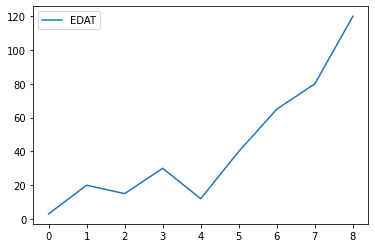

In [3]:
# OUTLIERS 
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('./dat/clients_02.csv', delimiter=";")
df= df.drop(['id'], axis=1)
print (df)
df.plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x28097125760>,
 'caps': [<matplotlib.lines.Line2D at 0x28097125e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x28097125400>],
 'medians': [<matplotlib.lines.Line2D at 0x28097131520>],
 'fliers': [<matplotlib.lines.Line2D at 0x28097131880>],
 'means': []}

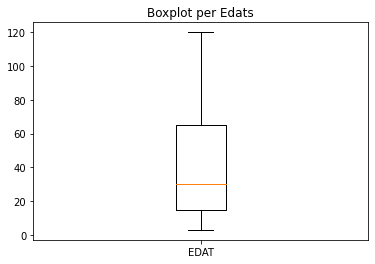

In [60]:
fig, ax = plt.subplots()
ax.set_title('Boxplot per Edats')
ax.boxplot(df["EDAT"], labels=["EDAT"])

In [11]:
q_low = df["EDAT"].quantile(0.01)
q_hi  = df["EDAT"].quantile(0.99)
print (q_low, q_hi)

3.7199999999999998 116.8


{'whiskers': [<matplotlib.lines.Line2D at 0x24ef64b06d0>,
 'caps': [<matplotlib.lines.Line2D at 0x24ef64b0d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x24ef64b0340>],
 'medians': [<matplotlib.lines.Line2D at 0x24ef64ba490>],
 'fliers': [<matplotlib.lines.Line2D at 0x24ef64ba7f0>],
 'means': []}

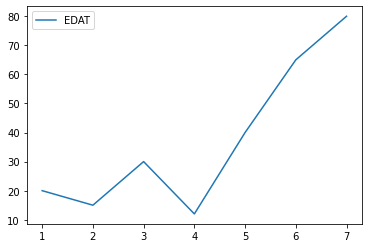

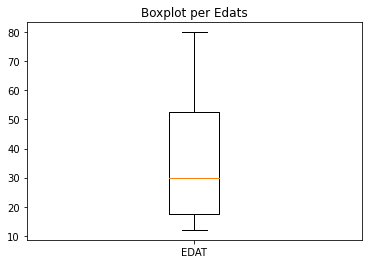

In [19]:
df_filtered = df[(df["EDAT"] < q_hi) & (df["EDAT"] > q_low)].copy()
df_filtered.plot()
fig, ax = plt.subplots()
ax.set_title('Boxplot per Edats')
ax.boxplot(df_filtered["EDAT"], labels=["EDAT"])

In [20]:
# Discretitzar una variable

df_filtered['GRUP'] = pd.cut(df_filtered['EDAT'], 4)
df_filtered

NOM CLIENT  EDAT            GRUP
1            Juan Alberto  Muete Camargo     20  (11.932, 29.0]
2              Isabela  Aldana Cristancho    15  (11.932, 29.0]
3      Cristian Camilo Castañeda Martínez    30    (29.0, 46.0]
4               María Antonia Rocha Borda    12  (11.932, 29.0]
5          Andrés Camilo Gutiérrez Cortes    40    (29.0, 46.0]
6             Lorenzo  Martínez Alvarado     65    (63.0, 80.0]
7  Sebastián Felipe  Avellaneda Trujillo     80    (63.0, 80.0]

In [21]:
df_filtered.loc[:,['GRUP']] = pd.cut(df_filtered['EDAT'], 4 
                             ,labels=['Jove', 'Adult', 'Jubilat', 'Senior'])
df_filtered

NOM CLIENT  EDAT    GRUP
1            Juan Alberto  Muete Camargo     20    Jove
2              Isabela  Aldana Cristancho    15    Jove
3      Cristian Camilo Castañeda Martínez    30   Adult
4               María Antonia Rocha Borda    12    Jove
5          Andrés Camilo Gutiérrez Cortes    40   Adult
6             Lorenzo  Martínez Alvarado     65  Senior
7  Sebastián Felipe  Avellaneda Trujillo     80  Senior

In [23]:
import pandas as pd

df = pd.DataFrame.from_dict({
    'Age': [10, 35, 34, 23, 70, 55, 89],
    'Height': [130, 178, 155, 133, 195, 150, 205],
    'Weight': [80, 200, 220, 150, 140, 95, 180]
})
df


Age  Height  Weight
0   10     130      80
1   35     178     200
2   34     155     220
3   23     133     150
4   70     195     140
5   55     150      95
6   89     205     180

In [24]:
def absolute_maximum_scale(series):
    return series / series.abs().max()

for col in df.columns:
    df[col] = absolute_maximum_scale(df[col])

print(df)

        Age    Height    Weight
0  0.112360  0.634146  0.363636
1  0.393258  0.868293  0.909091
2  0.382022  0.756098  1.000000
3  0.258427  0.648780  0.681818
4  0.786517  0.951220  0.636364
5  0.617978  0.731707  0.431818
6  1.000000  1.000000  0.818182


In [1]:
## UN ALTRE EXEMPLE DE CREAR COLUMNES

txt = """nombre,peso,altura
Basilio,67,1.5
Arturo,80,1.7
Cristina,50,1.4
Alfonso,100,2.0
Nerea,70,1.8 
"""
with open('./dat/pesos.csv', "w", encoding="UTF-8") as f :
    f.write(txt)

In [2]:
import pandas as pd

def imc(x):
    return x["peso"]/(x["altura"]**2)


df2 = pd.read_csv("./dat/pesos.csv")

# ----------- forma 1 
df2['imc1'] = round(df2['peso'] / df2['altura'] **2,2)

# ----------- forma 2
df2['imc2'] = df2.apply(lambda x: x['peso'] / x['altura'] **2, axis=1)

# ----------- forma 3
df2["imc3"] = df2.apply(imc,axis=1)

df2

nombre  peso  altura   imc1       imc2       imc3
0   Basilio    67     1.5  29.78  29.777778  29.777778
1    Arturo    80     1.7  27.68  27.681661  27.681661
2  Cristina    50     1.4  25.51  25.510204  25.510204
3   Alfonso   100     2.0  25.00  25.000000  25.000000
4     Nerea    70     1.8  21.60  21.604938  21.604938